# IRIS FLOWER CLASSIFICATION

#### The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurementsof Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn fromthese measurements and accurately classify the Iris flowers into their respective species.

#### Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductoryclassification tasks.

#### Dataset:https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Data Gatharning 

In [7]:
# import OS Library

import os      # use for interacting with the operating system
os.chdir('D:/CODSOFT_iris_flower_classification/repository/NOTEBOOK')   

In [8]:
# import panda Library

import pandas as pd     # use for data manipulation and analysis
df=pd.read_csv('IRIS.csv')

## Data Information

In [9]:
# First five rows of DataFrame

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Lasr five rows of DataFrame

df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
# To get a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
# To get summary statistics for numerical columns

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# To get the dimensions of the DataFrame

df.shape

(150, 5)

## Visualization

In [14]:
# Import library for visualization

import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# import warnings modules to ignore warnings massages

from warnings import filterwarnings
filterwarnings ('ignore')

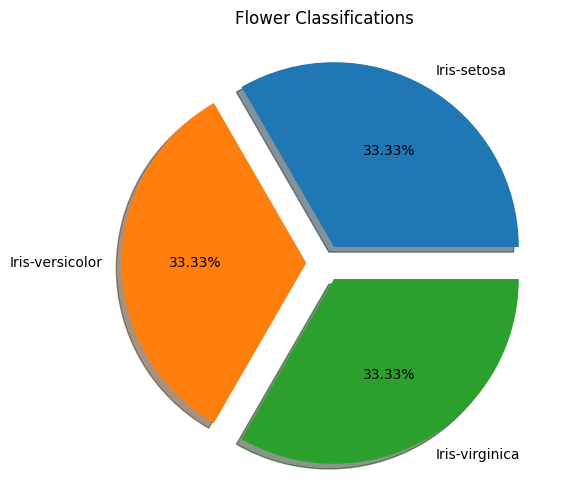

In [16]:
###### Visualize the flower classification

# Calculate the size of each category

size = df['species'].value_counts()
labels = size.index

# Define the explosion values for each category

explode = [0.1] * len(size)  # Adjust the explosion values as needed

# Plotting the pie chart

plt.figure(figsize=(6, 6))
plt.pie(size, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True)
plt.title('Flower Classifications')
plt.show()

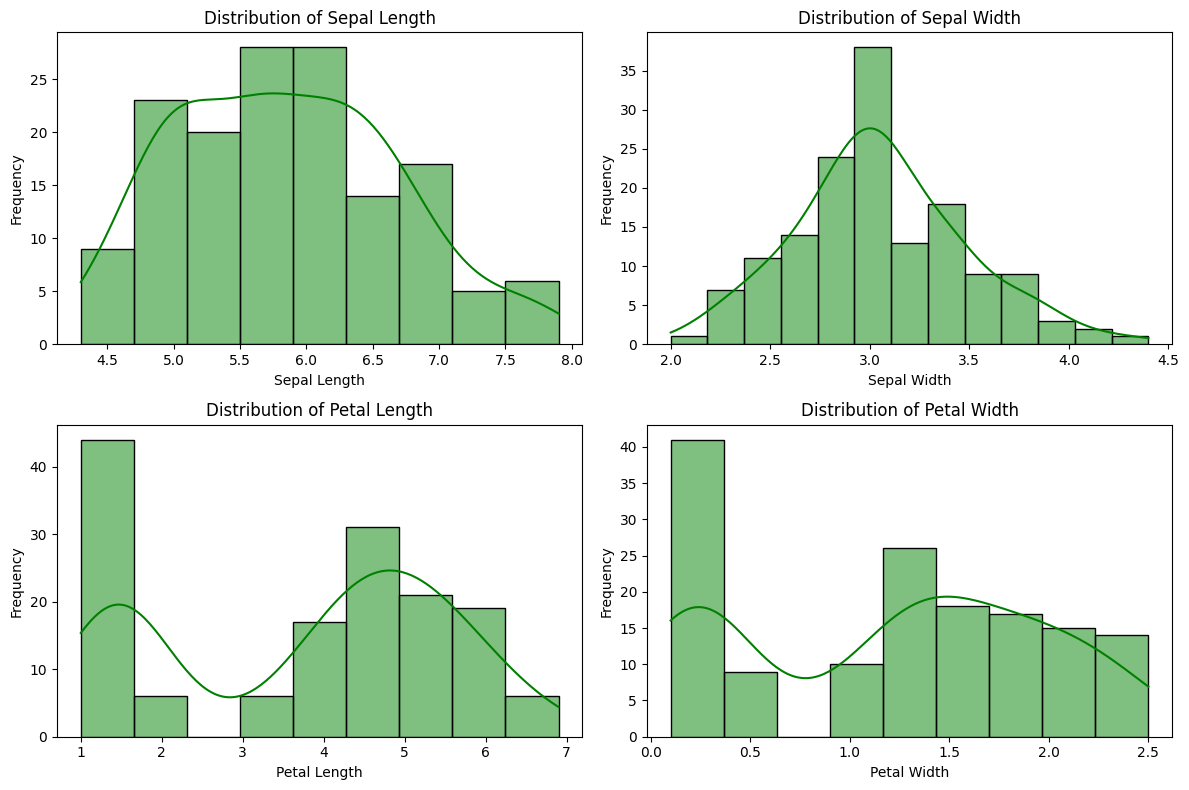

In [17]:
# feature distributions using histograms

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='Green')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

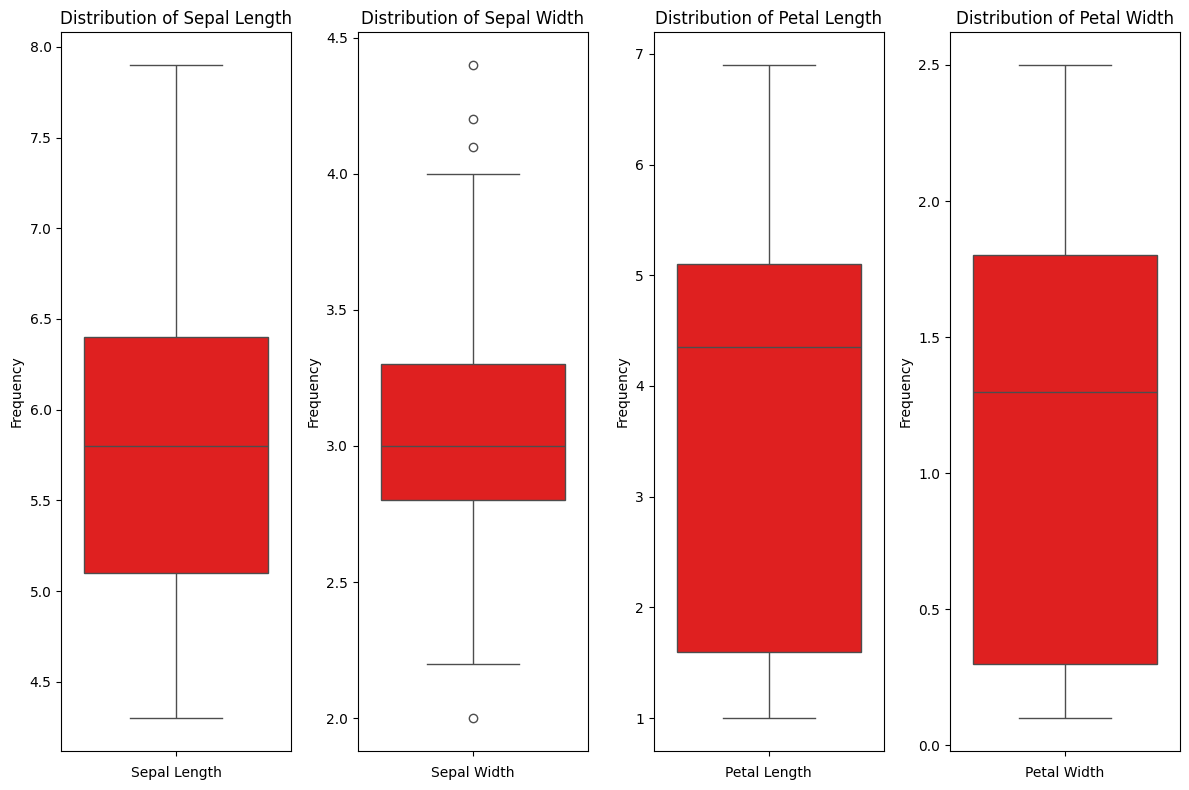

In [18]:
# plotting the boxplot of each continuas columns.

# to check outlier

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, start=1):
    plt.subplot(1, 4, i)
    sns.boxplot(df[feature],color='red')
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

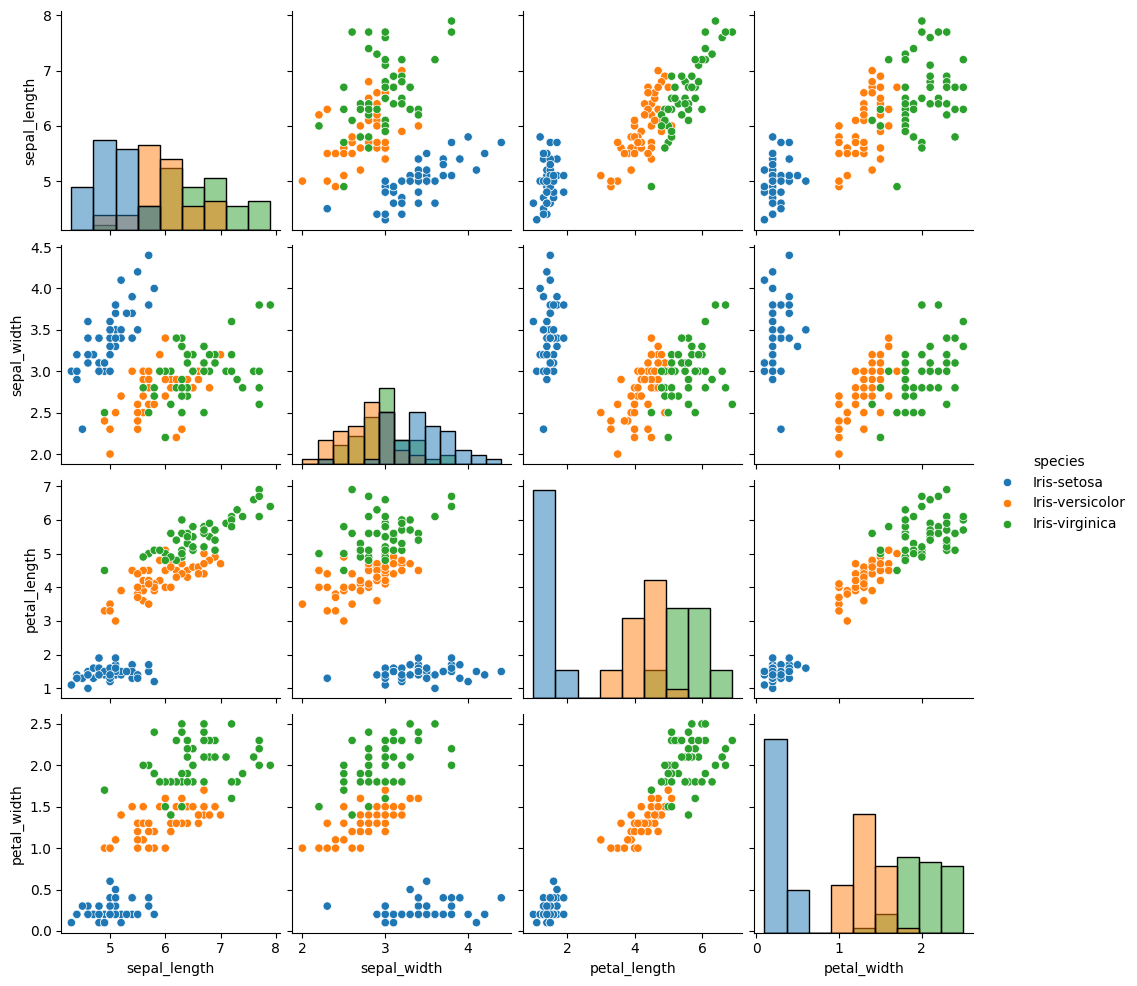

In [19]:
# Pairplot for visualizing relationships between features

sns.pairplot(df, hue='species', diag_kind='hist')
plt.show()


In [20]:
# Correlation heatmap

plt.figure(figsize=(8, 6))

sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Iris-setosa'

<Figure size 800x600 with 0 Axes>

## Define x and y

In [21]:
# Define x and y variables

x=df.drop(['species'],axis=1)
y=df['species']

In [22]:
# First five rows of x DataFrame

x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# first five rows of y DataFrame

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

## Preprocessing

In [77]:
# import labraries for preprocessing.

from sklearn.preprocessing import StandardScaler,LabelEncoder

# Preprocessing for x DataFrame

scaler=StandardScaler()

x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
print ('processed x DataFrame:-\n',x1)

# Preprocessing for y Data

encoder=LabelEncoder()

y1=encoder.fit_transform(y)
print ('Processed y data:- \n',y1)


processed x DataFrame:-
      sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]
Processed y data:- 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 

In [78]:
import pickle

with open('scaler.pkl','wb') as file1:
    pickle.dump(scaler,file1)

with open('encoder.pkl','wb') as file2:
    pickle.dump(encoder,file2)

## Spliting data

In [79]:
# import libarary for spliting data

from sklearn.model_selection import train_test_split

# Data split 80% for training and 20% for testing

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=21)

## Model Building

1. DecisionTreeClassifier

2. RandomForestClassifier

3. AdaBoostClassifier

4. KNeighborsClassifier

5. SVC

## Model Bilding - Decision Tree Classifier 

In [80]:
# import labraries for model bulding for classification.

from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dc=DecisionTreeClassifier(random_state=21)

# Model (Decision Tree Classifier)
dc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=21)

## Model Predicting - Decision Tree Classifier 

In [81]:
# Predict on the train set
dc_y1_predict_train = dc.predict(x_train)
print ('dc_y1_predict_train: \n',dc_y1_predict_train)

# Predict on the test set
dc_y1_predict_test=dc.predict(x_test)
print ('dc_y1_predict_test: \n', dc_y1_predict_test)

dc_y1_predict_train: 
 [0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 2 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]
dc_y1_predict_test: 
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


## Model Evaluation - Decision Tree Classifier

In [82]:
# import labraries for model evaluation.

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Accuracy_score : 1.0
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


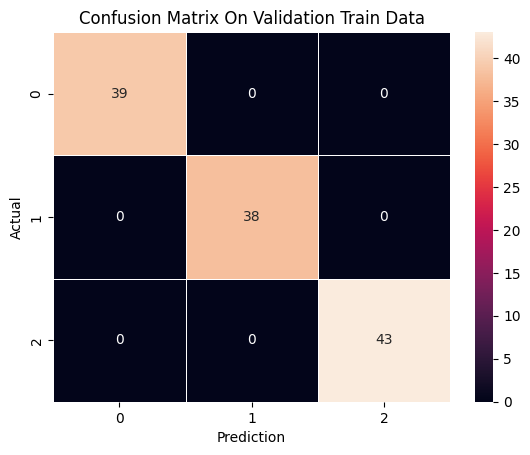

In [83]:
# Train data evaluation

# Accuracy_score

dc_acc_train=accuracy_score(dc_y1_predict_train,y_train)
print ('Accuracy_score :', dc_acc_train)

print (' *  -  *  '*12)

# Classification_report

dc_clr_train=classification_report(dc_y1_predict_train,y_train)
print ('Classification_report: \n',dc_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

dc_cm_train=confusion_matrix(dc_y1_predict_train,y_train)
sns.heatmap(dc_cm_train, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.9333333333333333
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


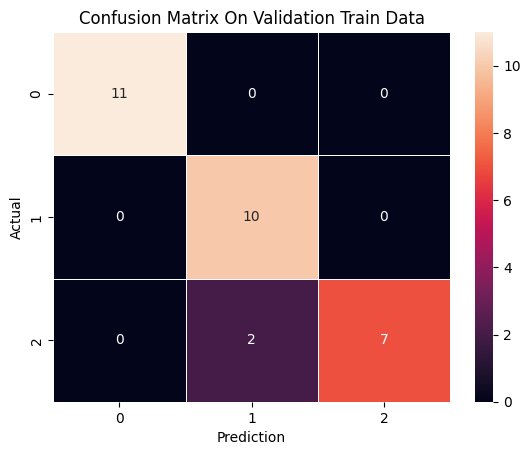

In [84]:
# Test data evaluation

# Accuracy_score

dc_acc_test=accuracy_score(dc_y1_predict_test,y_test)
print ('Accuracy_score :', dc_acc_test)

print (' *  -  *  '*12)

# Classification_report

dc_clr_test=classification_report(dc_y1_predict_test,y_test)
print ('Classification_report: \n',dc_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

dc_cm_test=confusion_matrix(dc_y1_predict_test,y_test)
sns.heatmap(dc_cm_test, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Model Bilding - Random Forest Classifier

In [85]:
# import labraries for model bulding for classification.

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rfc=RandomForestClassifier(random_state=21)

# Model (Random Forest Classifier)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=21)

## Model Predicting - Random Forest Classifier

In [86]:
# Predict on the train set
rfc_y1_predict_train = rfc.predict(x_train)
print ('rfc_y1_predict_train: \n',rfc_y1_predict_train)

# Predict on the test set
rfc_y1_predict_test=rfc.predict(x_test)
print ('rfc_y1_predict_test: \n', rfc_y1_predict_test)

rfc_y1_predict_train: 
 [0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 2 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]
rfc_y1_predict_test: 
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 1 0 2 2 1 2 1 0 1 0 0 1 2]


## Model Evaluation - Random Forest Classifier

Accuracy_score : 1.0
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


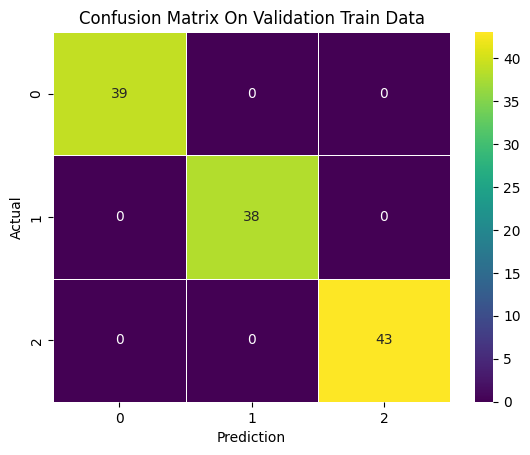

In [87]:
# Train data evaluation

# Accuracy_score

rfc_acc_train=accuracy_score(rfc_y1_predict_train,y_train)
print ('Accuracy_score :', rfc_acc_train)

print (' *  -  *  '*12)

# Classification_report

rfc_clr_train=classification_report(rfc_y1_predict_train,y_train)
print ('Classification_report: \n',rfc_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

rfc_cm_train=confusion_matrix(rfc_y1_predict_train,y_train)
sns.heatmap(rfc_cm_train, annot=True, linewidth=0.5, fmt='d',cmap='viridis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.9
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.91      0.87        11
           2       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


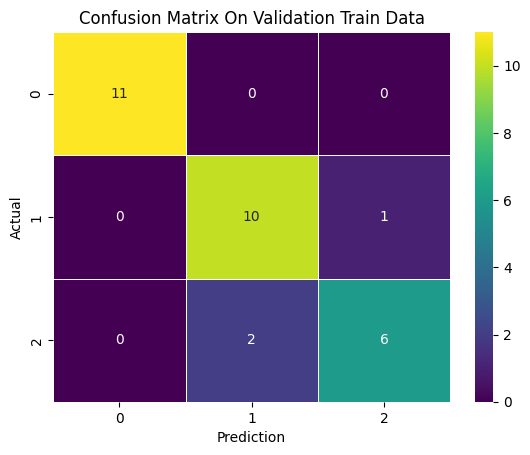

In [88]:
# Test data evaluation

# Accuracy_score

rfc_acc_test=accuracy_score(rfc_y1_predict_test,y_test)
print ('Accuracy_score :', rfc_acc_test)

print (' *  -  *  '*12)

# Classification_report

rfc_clr_test=classification_report(rfc_y1_predict_test,y_test)
print ('Classification_report: \n',rfc_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

rfc_cm_test=confusion_matrix(rfc_y1_predict_test,y_test)
sns.heatmap(rfc_cm_test, annot=True, linewidth=0.5, fmt='d',cmap='viridis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Model Bilding - Ada Boost Classifier

In [89]:
# import labraries for model bulding for classification.

from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost Classifier
abc=AdaBoostClassifier(random_state=21)

# Model (AdaBoost Classifier)
abc.fit(x_train, y_train)

AdaBoostClassifier(random_state=21)

## Model Predicting - Ada Boost Classifier

In [90]:
# Predict on the train set
abc_y1_predict_train = abc.predict(x_train)
print ('abc_y1_predict_train: \n',abc_y1_predict_train)

# Predict on the test set
abc_y1_predict_test=abc.predict(x_test)
print ('abc_y1_predict_test: \n', abc_y1_predict_test)

abc_y1_predict_train: 
 [0 2 1 0 1 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 1 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 1 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]
abc_y1_predict_test: 
 [1 0 0 0 1 1 0 1 0 0 1 1 2 2 0 2 1 1 0 2 1 1 2 1 0 1 0 0 1 2]


## Model Evaluation - Ada Boost Classifier

Accuracy_score : 0.975
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.93      0.96        41
           2       0.93      1.00      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.97       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


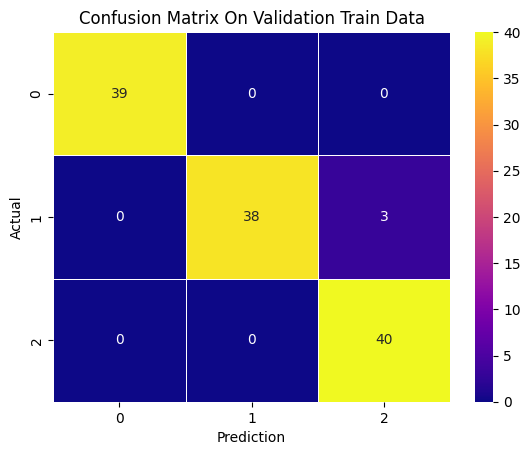

In [91]:
# Train data evaluation

# Accuracy_score

abc_acc_train=accuracy_score(abc_y1_predict_train,y_train)
print ('Accuracy_score :', abc_acc_train)

print (' *  -  *  '*12)

# Classification_report

abc_clr_train=classification_report(abc_y1_predict_train,y_train)
print ('Classification_report: \n',abc_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

abc_cm_train=confusion_matrix(abc_y1_predict_train,y_train)
sns.heatmap(abc_cm_train, annot=True, linewidth=0.5, fmt='d',cmap='plasma')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.8333333333333334
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.77      0.80        13
           2       0.57      0.67      0.62         6

    accuracy                           0.83        30
   macro avg       0.80      0.81      0.81        30
weighted avg       0.84      0.83      0.84        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


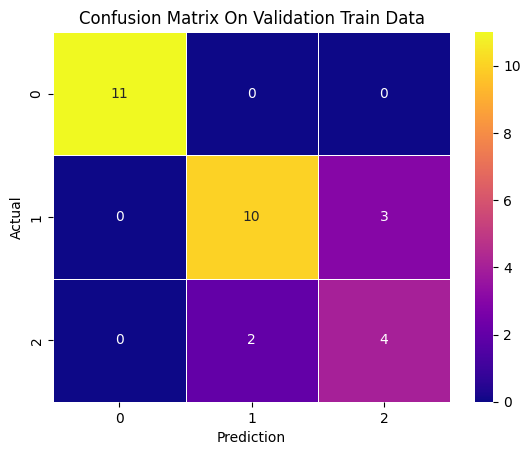

In [92]:
# Test data evaluation

# Accuracy_score

abc_acc_test=accuracy_score(abc_y1_predict_test,y_test)
print ('Accuracy_score :', abc_acc_test)

print (' *  -  *  '*12)

# Classification_report

abc_clr_test=classification_report(abc_y1_predict_test,y_test)
print ('Classification_report: \n',abc_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

abc_cm_test=confusion_matrix(abc_y1_predict_test,y_test)
sns.heatmap(abc_cm_test, annot=True, linewidth=0.5, fmt='d',cmap='plasma')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Model Bilding - K Neighbors Classifier

In [93]:
# import labraries for model bulding for classification.

from sklearn.neighbors import KNeighborsClassifier

# Initialize the K Neighbors Classifier

knn=KNeighborsClassifier()

# Model (K Neighbors Classifier)

knn.fit(x_train,y_train)

KNeighborsClassifier()

## Model Predicting - K Neighbors Classifier

In [94]:
# Predict on the train set
knn_y1_predict_train = knn.predict(x_train)
print ('knn_y1_predict_train: \n',knn_y1_predict_train)

# Predict on the test set
knn_y1_predict_test=knn.predict(x_test)
print ('knn_y1_predict_test: \n', knn_y1_predict_test)

knn_y1_predict_train: 
 [0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 1 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 1 1 1 2 2 2
 1 2 2 1 2 2 0 0 1]
knn_y1_predict_test: 
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


## Model Evaluation - K Neighbors Classifier

Accuracy_score : 0.975
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.95      0.96        39
           2       0.95      0.98      0.96        42

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.98       120
weighted avg       0.98      0.97      0.97       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


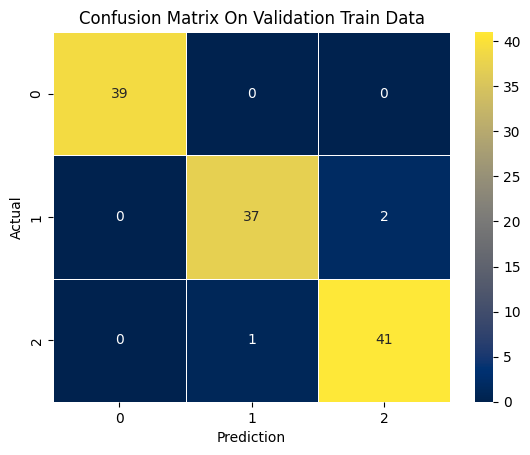

In [95]:
# Train data evaluation

# Accuracy_score

knn_acc_train=accuracy_score(knn_y1_predict_train,y_train)
print ('Accuracy_score :', knn_acc_train)

print (' *  -  *  '*12)

# Classification_report

knn_clr_train=classification_report(knn_y1_predict_train,y_train)
print ('Classification_report: \n',knn_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

knn_cm_train=confusion_matrix(knn_y1_predict_train,y_train)
sns.heatmap(knn_cm_train, annot=True, linewidth=0.5, fmt='d',cmap='cividis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.9333333333333333
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


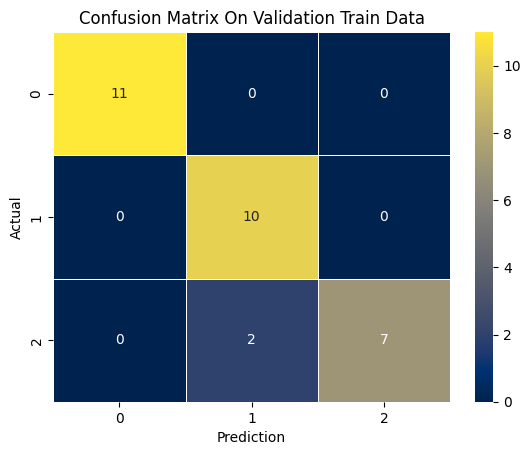

In [96]:
# Test data evaluation

# Accuracy_score

knn_acc_test=accuracy_score(knn_y1_predict_test,y_test)
print ('Accuracy_score :', knn_acc_test)

print (' *  -  *  '*12)

# Classification_report

knn_clr_test=classification_report(knn_y1_predict_test,y_test)
print ('Classification_report: \n',knn_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

knn_cm_test=confusion_matrix(knn_y1_predict_test,y_test)
sns.heatmap(knn_cm_test, annot=True, linewidth=0.5, fmt='d',cmap='cividis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Model Bilding - SVC

In [97]:
# import labraries for model bulding for classification.
from sklearn.svm import SVC

# Initialize the SVC
svc=SVC(random_state=21)

# Model (SVC Classifier)
svc.fit(x_train, y_train)

SVC(random_state=21)

## Model Predicting - SVC

In [98]:
# Predict on the train set
svc_y1_predict_train = svc.predict(x_train)
print ('svc_y1_predict_train: \n',svc_y1_predict_train)

# Predict on the test set
svc_y1_predict_test=svc.predict(x_test)
print ('svc_y1_predict_test: \n', svc_y1_predict_test)

svc_y1_predict_train: 
 [0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 2 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]
svc_y1_predict_test: 
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


## Model Evaluation - SVC

Accuracy_score : 0.9916666666666667
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      0.97      0.99        39
           2       0.98      1.00      0.99        42

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


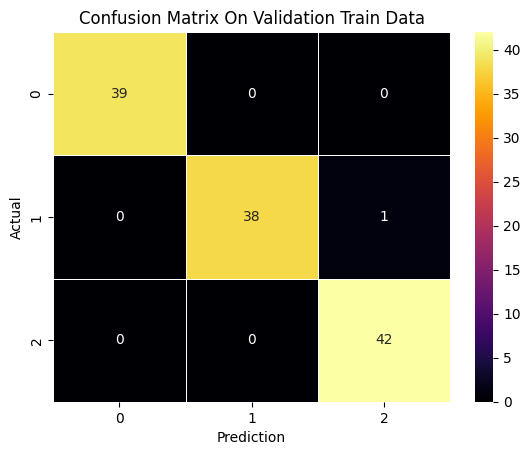

In [99]:
# Train data evaluation

# Accuracy_score

svc_acc_train=accuracy_score(svc_y1_predict_train,y_train)
print ('Accuracy_score :', svc_acc_train)

print (' *  -  *  '*12)

# Classification_report

svc_clr_train=classification_report(svc_y1_predict_train,y_train)
print ('Classification_report: \n',svc_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

svc_cm_train=confusion_matrix(svc_y1_predict_train,y_train)
sns.heatmap(svc_cm_train, annot=True, linewidth=0.5, fmt='d',cmap='inferno')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.9333333333333333
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


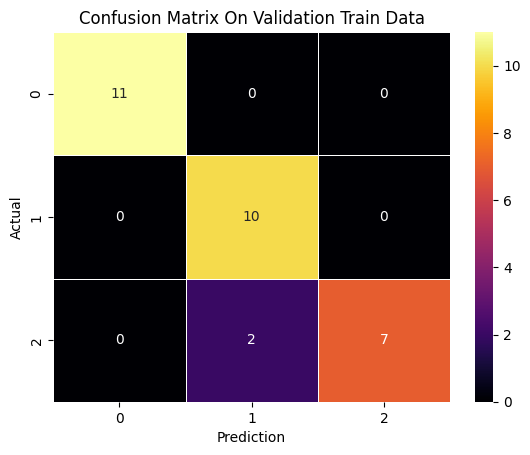

In [100]:
# Test data evaluation

# Accuracy_score

svc_acc_test=accuracy_score(svc_y1_predict_test,y_test)
print ('Accuracy_score :', svc_acc_test)

print (' *  -  *  '*12)

# Classification_report

svc_clr_test=classification_report(svc_y1_predict_test,y_test)
print ('Classification_report: \n',svc_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

svc_cm_test=confusion_matrix(svc_y1_predict_test,y_test)
sns.heatmap(svc_cm_test, annot=True, linewidth=0.5, fmt='d',cmap='inferno')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Pruning - Decision Tree Classifier

In [75]:
from sklearn.model_selection import GridSearchCV

# # Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini','entropy'],   # Measure the quality of a split
    'max_depth': [1,50],               # Max depth of the tree
    'min_samples_split': [1,50],       # Minimum samples required to split a node
    'min_samples_leaf': [1,50]         # Minimum samples required at each leaf node
}
   
# Create GridSearchCV object

dc_grid_search = GridSearchCV(dc,
                               param_grid=param_grid,
                               cv=10)
                               
# Perform grid search

dc_grid_search.fit(x_train, y_train)

# Best parameters

dc_best_params = dc_grid_search.best_params_

# Best score

dc_best_score = dc_grid_search.best_score_

print("Best Parameters:", dc_best_params)
print("Best Score:", dc_best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 50}
Best Score: 0.975


## Model building after Purning- Decision Tree Classifier

In [105]:
# Model building using best parameters

dc_best = DecisionTreeClassifier(random_state=21, criterion='gini', max_depth=50, min_samples_leaf=1, min_samples_split=0.01)

# Fitting the model with the training data

dc_best.fit(x_train, y_train)

# Predicting the train set results

dc_best_predict_train = dc_best.predict(x_train)
print('Predictions on train set:\n', dc_best_predict_train)

# Predicting the test set results

dc_best_predict_test = dc_best.predict(x_test)
print('Predictions on test set:\n', dc_best_predict_test)

Predictions on train set:
 [0 2 1 0 2 1 1 2 0 2 2 2 2 1 2 0 0 0 1 0 1 0 1 2 1 1 0 0 2 0 0 0 0 0 1 1 0
 2 1 0 0 2 1 0 2 1 2 0 2 0 0 1 2 1 1 0 2 1 0 2 1 1 2 1 2 1 2 2 0 0 2 2 0 1
 2 1 1 2 1 2 0 2 2 0 0 1 2 0 0 1 2 0 0 1 2 2 0 2 1 0 1 2 1 0 2 2 1 1 2 2 2
 1 2 1 1 2 2 0 0 1]
Predictions on test set:
 [1 0 0 0 1 1 0 2 0 0 1 1 2 2 0 2 2 1 0 2 2 1 2 1 0 1 0 0 1 2]


In [106]:
with open('dc_best_predict.pkl', 'wb') as file3:
    pickle.dump(dc_best, file3)

## Model Evaluation after Purning- Decision Tree Classifier

Accuracy_score : 1.0
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        43

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


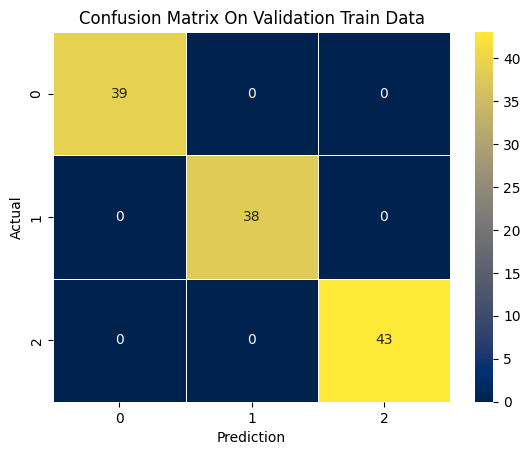

In [107]:
# Train data evaluation

# Accuracy_score

dc_best_acc_train=accuracy_score(dc_best_predict_train,y_train)
print ('Accuracy_score :', dc_best_acc_train)

print (' *  -  *  '*12)

# Classification_report

dc_best_clr_train=classification_report(dc_best_predict_train,y_train)
print ('Classification_report: \n',dc_best_clr_train)

print (' *  -  *  '*12)

# Confusion_metrix

dc_best_cm_train=confusion_matrix(dc_best_predict_train,y_train)
sns.heatmap(dc_best_cm_train, annot=True, linewidth=0.5, fmt='d',cmap='cividis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

Accuracy_score : 0.9333333333333333
 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  
Classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91        10
           2       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

 *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *   *  -  *  


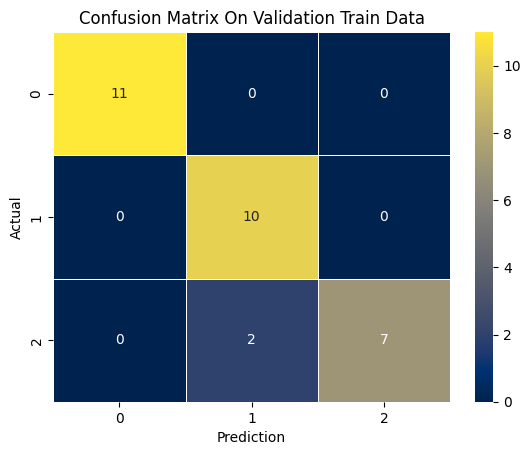

In [108]:
# Test data evaluation

# Accuracy_score

dc_best_acc_test=accuracy_score(dc_best_predict_test,y_test)
print ('Accuracy_score :', dc_best_acc_test)

print (' *  -  *  '*12)

# Classification_report

dc_best_clr_test=classification_report(dc_best_predict_test,y_test)
print ('Classification_report: \n',dc_best_clr_test)

print (' *  -  *  '*12)

# Confusion_metrix

dc_best_cm_test=confusion_matrix(dc_best_predict_test,y_test)
sns.heatmap(dc_best_cm_test, annot=True, linewidth=0.5, fmt='d',cmap='cividis')
plt.title('Confusion Matrix On Validation Train Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

## Predection - User Input

In [109]:
def predict_data (custom_scaler, custom_encoder, custom_model):
    
    """
    Predicts the class label and probability for input data using the provided scaler, encoder and model.

    Args:
    - custom_scaler: The scaler object used to scale input features.
    - custom_encoder: The encoder object used to transform predicted numeric labels back to categorical labels.
    - custom_model: The trained machine learning model.

    Returns:
    - predicted_label: The predicted class label for the input data.
    - probability: The probability associated with the predicted class label.
    
    """
    # Prompt user to enter input data
    
    sepal_length=float(input('Enter the Sepal Length in centimeters (cm): '))
    sepal_width=float(input('Emter the Sepal width in centimeters (cm): '))
    petal_length=float(input('Enter the Petal Length in centimeters (cm): '))
    petal_width=float(input('Enter the Petal width in centimeters (cm): '))
    
    # Create a DataFrame with the input data

    new_df=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    new_df.columns=['sepal_length','sepal_width','petal_length','petal_width']

    print('Input data:\n',new_df)
    
    # Preprocess the input data using the scaler

    x_preprocess=pd.DataFrame(custom_scaler.transform(new_df))
    x_preprocess.columns=['sepal_length','sepal_width','petal_length','petal_width']

    print('Preprocess Data:\n',x_preprocess)
    
    # Predict the class label for the preprocessed data using the model

    y_predict=custom_model.predict(x_preprocess)
    
    # Transform the predicted numeric label back to categorical label using the encoder

    y_pred_labelencoder=custom_encoder.inverse_transform(y_predict)[0]
    
    # Calculate the probability associated with the predicted class label

    prob=custom_model.predict_proba(x_preprocess).max()
    
    # Generate prediction string with class label and probability

    prediction=f'{y_pred_labelencoder} with probability {prob}'

    return y_pred_labelencoder,prob

In [110]:
predict_data (scaler,encoder,dc_best)

Input data:
    sepal_length  sepal_width  petal_length  petal_width
0           4.0          5.0           2.0          4.0
Preprocess Data:
    sepal_length  sepal_width  petal_length  petal_width
0     -2.233528     4.503102     -1.000078     3.682996


('Iris-versicolor', 1.0)

In [111]:
import pickle

# Define the filename for the pickle file
filename = 'iris_flower_classification_model.pkl'

# Save the model to a file
with open(filename, 'wb') as file4:
    pickle.dump(dc_best, file4)